In [10]:
##Some code to run at the beginning of the file, to be able to show images in the notebook
##Don't worry about this cell

#Print the plots in this screen
%matplotlib inline 

#Be able to plot images saved in the hard drive
from IPython.display import Image 

#Make the notebook wider
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:90% !important; }</style>"))

import seaborn as sns
import pylab as plt
import pandas as pd
import numpy as np
import scipy.stats



#A function to annotate a scatter plot
def annotate_scatter(x,y,label,data,fontsize=14,right_offset=0,down_offset=0):
    """
    Function to annotate a scatter plot
    
    Input:
    x: name of variable in x axis
    y: name of variable in y axis
    label: name of variable with the labels
    data: dataframe
    fontsize (default 14): font size
    
    """
       
    for label,x,y in zip(data[label],data[x],data[y]):
        plt.annotate(label,(x+right_offset,y+down_offset),fontsize=fontsize)

## Gender bias in college admissions. Simpson's paradox
In 1973, UC Berkeley was sued for gender bias, because their graduate school admission figures showed obvious bias against women

Bickel, P. J., Hammel, E. A., & O’Connell, J. W. (1975). Sex bias in graduate admissions: Data from Berkeley. Science, 187(4175), 398–404. http://doi.org/10.1126/science.187.4175.398↩

In [11]:
#Let's read the data
df = pd.read_csv("./data/UCBerkeley.csv",index_col=0)
df.head()

,Admit,Gender,Dept,Freq
1,Admitted,Male,A,512
2,Rejected,Male,A,313
3,Admitted,Female,A,89
4,Rejected,Female,A,19
5,Admitted,Male,B,353


In [12]:
#And find the association between admission and gender
by_gender = pd.crosstab(df["Admit"],df["Gender"],values=df["Freq"],aggfunc=sum)
by_gender

Gender,Female,Male
Admit,,
Admitted,557,1198
Rejected,1278,1493


In [4]:
pd.crosstab(df["Admit"],df["Gender"],values=df["Freq"],aggfunc=sum,normalize="columns")

Gender,Female,Male
Admit,,
Admitted,0.303542,0.445188
Rejected,0.696458,0.554812


In [5]:
#Do the statistics
chi,p,dof,expected = scipy.stats.chi2_contingency(by_gender)
print('p-value', p)

p-value 1.05579680878e-21


## Is there a gender bias in the admissions?
- What could be happening?
- Are we ommiting any variable?

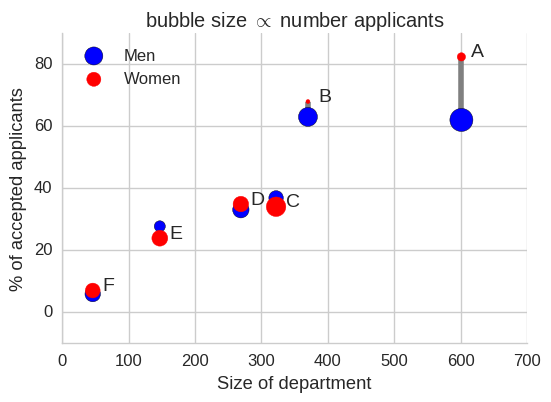

In [15]:
#And find the association between admission and gender and dept
by_gender_dept = pd.crosstab(df["Admit"],[df["Dept"],df["Gender"]],values=df["Freq"],aggfunc=sum)
by_gender_dept

#And find the association between admission and gender
by_gender_dept = pd.crosstab(df["Admit"],[df["Dept"],df["Gender"]],values=df["Freq"],aggfunc=sum,normalize="columns")
by_gender_dept


##Let's find the size of the departments
size_dept = df.loc[df["Admit"]=="Admitted"].groupby("Dept").sum().reset_index()
size_dept.columns = ["Dept","Size_dept"]
size_dept.head()


##And let's calculate the percentage of admitted students by gender. For this we need to pivot the column with Admitted/Rejected to make two columns


#Columns already present
variables_already_present = ["Gender","Dept"]

#Column with the variables
column_to_split = ["Admit"]

#Column with the values
column_with_values = "Freq"

#Fix
df_fixed = df.pivot_table(column_with_values,
               variables_already_present,
               column_to_split).reset_index()

#Now make the column with the percentage of admitteed
df_fixed["Perc_admitted"] = 100*df_fixed["Admitted"]/(df_fixed["Admitted"]+df_fixed["Rejected"])
df_fixed["Applied"] = df_fixed["Admitted"]+df_fixed["Rejected"]
df_fixed


##Merge both datasets
df_fixed = pd.merge(df_fixed,size_dept)
df_fixed.head()


male = df_fixed.loc[df_fixed["Gender"]=="Male"].sort_values(by="Dept")
female = df_fixed.loc[df_fixed["Gender"]=="Female"].sort_values(by="Dept")



#Make the background white
sns.set(style="whitegrid",font_scale=1.2)

#Figure
plt.figure(figsize=(6,4))

#Vertical lines between the y values of male and the y value of female
plt.vlines(male["Size_dept"],male["Perc_admitted"],female["Perc_admitted"],color="gray",linewidth=4)

plt.scatter(male["Size_dept"],male["Perc_admitted"],s=male["Applied"]/3,zorder=3,label="Men")
plt.scatter(female["Size_dept"],female["Perc_admitted"],s=female["Applied"]/3,color="red",zorder=3,label="Women")
plt.legend(loc="upper left")
plt.xlabel("Size of department")
plt.ylabel("% of accepted applicants")

#Let's annotate it
annotate_scatter("Size_dept","Perc_admitted","Dept",female,fontsize=14,right_offset=15)
        
        
plt.title("bubble size $\propto$ number applicants ")
sns.despine()

In [ ]:
- What type of plot would be most appropriate

In [ ]:
- What type of plot would be most appropriate

----------

----

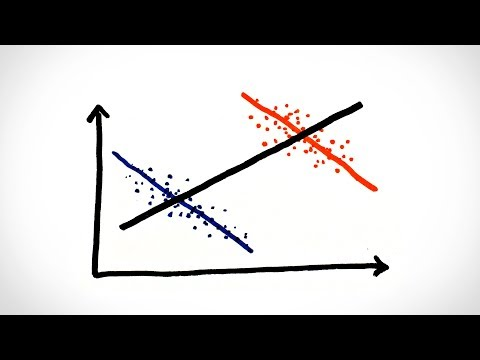

In [78]:
from IPython.display import YouTubeVideo
YouTubeVideo("ebEkn-BiW5k")

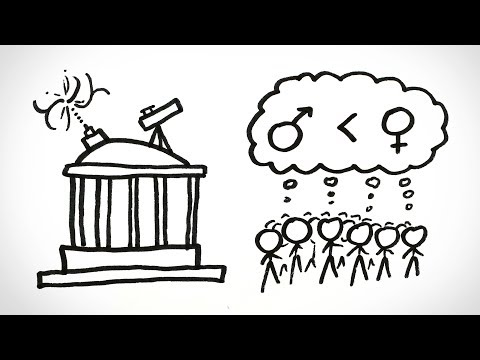

In [79]:
YouTubeVideo("E_ME4P9fQbo")